In [2]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [3]:
sns.set_style("whitegrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data.csv')
df = df[df["Y"].between(df.Y.quantile(.15),df.Y.quantile(.85))]
y = pd.DataFrame(df['Y'])
X = df.drop('Y', axis = 1)
bins = np.linspace(y.min()[0],y.max()[0],20)
df = df.reset_index(drop = True)
y = pd.DataFrame(np.digitize(y, bins = bins))
df['Y'] = y

In [6]:
df['Y'].value_counts()

2     831
3     714
1     674
5     584
4     580
6     488
7     470
8     354
9     330
10    281
13    273
11    266
12    215
15    190
14    177
17    155
16    153
18    150
19    111
20      5
Name: Y, dtype: int64

<AxesSubplot:>

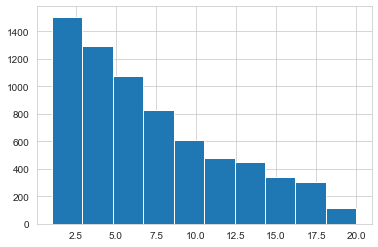

In [7]:
df.Y.hist()

In [8]:
desc = pd.read_excel('data_description.xlsx')

In [9]:
desc_1 = desc[(~(desc.OPIS.str.contains('3')) & (~(desc.OPIS.str.contains('6'))))]
desc_3 = desc[desc.OPIS.str.contains('3')]
desc_3 = pd.concat([desc.iloc[:2], desc_3])
desc_6 = desc[desc.OPIS.str.contains('6')]
desc_6 = pd.concat([desc.iloc[:2], desc_6])

In [10]:
len(desc_1)+len(desc_3)-2+len(desc_6)-2 == len(desc)

True

In [11]:
df_1 = df[df.columns.intersection(list(desc_1.NAZWA))]
df_3 = df[df.columns.intersection(list(desc_3.NAZWA))]
df_6 = df[df.columns.intersection(list(desc_6.NAZWA))]

In [12]:
df_train, df_test = train_test_split(df, train_size = 0.9 , stratify = df['Y'])

In [13]:
X_train = df_train.drop('Y', axis = 1)
y_train = df_train.Y
X_test = df_test.drop('Y', axis = 1)
y_test = df_test.Y

In [14]:
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295
0,1,27,0.0,0.0,0.0,0.0,0,0,0,23.4,...,27,48,95,6883.0,21767.1,43137.0,7255.7,2,6,12
1,10,27,0.0,0.0,0.0,0.0,0,0,0,126.8,...,2,8,11,0.0,0.0,0.0,0.0,0,0,0
2,7,34,0.0,0.0,0.0,0.0,0,0,0,280.9,...,5,28,46,7375.3,21832.7,38992.3,7277.6,1,3,6
3,4,39,0.0,0.0,0.0,0.0,0,0,0,0.0,...,14,38,78,4262.5,14908.1,29670.8,4969.4,2,7,13
4,6,38,0.0,0.0,0.0,0.0,0,0,0,0.0,...,4,14,28,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,6,30,0.0,0.0,0.0,0.0,0,0,0,101.0,...,2,7,18,5666.9,25580.1,40805.4,8526.7,1,4,7
6997,1,33,0.0,0.0,0.0,0.0,0,0,0,0.0,...,5,13,19,3805.1,10337.2,25905.8,3445.8,1,3,6
6998,11,33,0.0,0.0,0.0,0.0,0,0,0,0.0,...,13,41,55,9156.8,36284.1,63623.8,12094.7,1,3,6
6999,2,23,0.0,0.0,0.0,0.0,0,0,0,4.5,...,1,6,23,4357.0,12714.0,22976.0,4238.0,1,3,6


In [15]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train.values.ravel())
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

The mean squared error (MSE) on test set: 13.7187
0.5226453254048758
0.4439866460880625


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lr.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lr.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.28
Wynik dla zestawu testowego: 0.15


In [17]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.48082833152769977
0.15461729327773244


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# perform a robust scaler transform of the dataset
trans = StandardScaler()
X_train_t = trans.fit_transform(X_train)
X_test_t = trans.transform(X_test)
 
scaler = MinMaxScaler()
X_train_t = pd.DataFrame(scaler.fit_transform(X_train_t), columns=X_train.columns)
X_test_t = pd.DataFrame(scaler.transform(X_test_t), columns=X_train.columns)

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
 
chi_best_k = SelectKBest(chi2, k=10).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)


Tu można się pobawić w ilość zmiennych wg k = ... i wtedy próbować dalej z regresją. Jeszcze myślałem, żeby je podzielić wg kategorii - tzn łącznie jest 98 kategorii, w każdej 3 perspektywy czasowe. Najpierw żeby w każdej kategorii wybrać najlepszą perspektywę, a później ewentualnie redukować wymiary dodatkowo. Dzięki temu z uniknie się korelacji pomiedzy zmiennymi g

In [20]:
chi_best_k = SelectKBest(chi2, k=50).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)

chi_best_feats = []
for i in range(len(list(chi_best_k.get_support()))):
    if list(chi_best_k.get_support())[i] == True:
        chi_best_feats.append(list(X_train.columns)[i])


desc_best_feats = desc.loc[desc['NAZWA'].isin(chi_best_feats)]
desc_best_feats.to_excel('best_feats.xlsx')
desc_3b = desc_best_feats[desc_best_feats.OPIS.str.contains('3')]
desc_6b = desc_best_feats[desc_best_feats.OPIS.str.contains('6')]

In [21]:
desc_best_feats

,NAZWA,OPIS
3,X3,Sumaryczna kwota wydatków klienta związanych z...
4,X4,Sumaryczna kwota wydatków klienta związanych z...
16,X16,Sumaryczna kwota transakcji w bankomatach w os...
17,X17,Sumaryczna kwota transakcji w bankomatach w 3 ...
18,X18,Sumaryczna kwota transakcji w bankomatach w 6 ...
19,X19,Średnia kwota transakcji w bankomatach w 3 ost...
23,X23,Sumaryczna kwota wydatków klienta w ostatnim p...
24,X24,Sumaryczna kwota wydatków klienta w 3 ostatnic...
25,X25,Sumaryczna kwota wydatków klienta w w 6 ostatn...
26,X26,Średnia kwota wydatków klienta w 3 ostatnich m...


In [22]:
print(f'number of features: {len(desc_best_feats)}')
print(f'6 months perspective: {len(desc_6b)}')
print(f'3 months perspective: {len(desc_3b)}')
print(f'1 month perspective: {len(desc_best_feats)-len(desc_3b)-len(desc_6b)}')

number of features: 50
6 months perspective: 19
3 months perspective: 22
1 month perspective: 9


In [23]:
df_chi = df[df.columns.intersection(list(desc_3b.NAZWA))]
df_chi.reset_index(drop = True)
df_chi['Y'] = y

In [24]:
df_chi_train, df_chi_test = train_test_split(df_chi, train_size = 0.9 , stratify = df_chi['Y'])

In [25]:
X_chi_train = df_chi_train.drop('Y', axis = 1)

X_chi_test = df_chi_test.drop('Y', axis = 1)

y_chi_train = df_chi_train.Y

y_chi_test = df_chi_test.Y

In [26]:
X_chi_train

,X3,X17,X19,X24,X26,X31,X33,X38,X150,X164,...,X220,X255,X257,X262,X269,X276,X283,X285,X290,X292
3116,0.0,0.0,0.0,29507.5,9835.8,0.0,0.0,0.0,623.1,0.0,...,725.2,0.0,0.0,0.0,0.0,0.0,20574.7,6858.2,14168.1,4722.7
3814,0.0,0.0,0.0,54825.8,18275.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56678.0,18892.7,0.0,0.0
5596,0.0,0.0,0.0,49336.4,16445.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76000.0,25333.3,0.0,0.0
6760,0.0,0.0,0.0,92474.3,30824.8,0.0,0.0,0.0,410.2,0.0,...,2143.7,0.0,0.0,0.0,0.0,0.0,33722.0,11240.7,18002.0,6000.7
3153,0.0,450.0,150.0,112515.0,37505.0,0.0,0.0,0.0,231.0,0.0,...,505.4,0.0,0.0,0.0,0.0,0.0,101711.5,33903.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,0.0,900.0,300.0,14813.6,4937.8,0.0,0.0,0.0,519.1,0.0,...,316.6,0.0,0.0,0.0,0.0,0.0,24433.2,8144.4,12271.0,4090.3
717,0.0,0.0,0.0,57714.3,19238.1,0.0,0.0,3668.0,556.7,0.0,...,707.2,0.0,0.0,0.0,0.0,0.0,169512.0,56504.0,36385.0,12128.3
5427,0.0,8006.0,2668.7,59266.3,19755.4,0.0,0.0,1915.2,1227.3,0.0,...,2633.9,0.0,0.0,0.0,0.0,0.0,21019.3,7006.4,20432.4,6810.8
6886,0.0,380.0,126.7,32384.5,10794.8,0.0,0.0,0.0,658.5,0.0,...,524.3,0.0,0.0,0.0,0.0,0.0,25602.8,8534.3,14610.4,4870.2


In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_chi_train, y_chi_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lr.score(X_chi_train, y_chi_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lr.score(X_chi_test, y_chi_test)))

Wynik dla zestawu uczącego: 0.09
Wynik dla zestawu testowego: 0.08


In [28]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_chi_train, y_chi_train)
print(reg.score(X_chi_train, y_chi_train))
print(reg.score(X_chi_test, y_chi_test))

0.47619348247294513
0.2595041106917576


In [29]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_chi_train, y_chi_train.values.ravel())
mse = mean_squared_error(y_chi_test, reg.predict(X_chi_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_chi_train, y_chi_train))
print(reg.score(X_chi_test, y_chi_test))

The mean squared error (MSE) on test set: 16.6188
0.40314995552430455
0.32644746213618236


In [30]:
mse_list = []
train = []
test = []
for i in range(10,100):
    chi_best_k = SelectKBest(chi2, k=i).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)

    chi_best_feats = []
    for i in range(len(list(chi_best_k.get_support()))):
        if list(chi_best_k.get_support())[i] == True:
            chi_best_feats.append(list(X_train.columns)[i])


    desc_best_feats = desc.loc[desc['NAZWA'].isin(chi_best_feats)]
    desc_best_feats.to_excel('best_feats.xlsx')
    desc_3b = desc_best_feats[desc_best_feats.OPIS.str.contains('3')]

    df_chi = df[df.columns.intersection(list(desc_3b.NAZWA))]
    df_chi.reset_index(drop = True)
    df_chi['Y'] = y

    df_chi_train, df_chi_test = train_test_split(df_chi, train_size = 0.9 , stratify = df_chi['Y'])

    X_chi_train = df_chi_train.drop('Y', axis = 1)
    X_chi_test = df_chi_test.drop('Y', axis = 1)
    y_chi_train = df_chi_train.Y
    y_chi_test = df_chi_test.Y

    reg = ensemble.GradientBoostingRegressor()
    reg.fit(X_chi_train, y_chi_train.values.ravel())
    mse = mean_squared_error(y_chi_test, reg.predict(X_chi_test))
    mse_list.append(mse)
    train.append(reg.score(X_chi_train, y_chi_train))
    test.append(reg.score(X_chi_test, y_chi_test))


In [31]:
evaluation = pd.DataFrame(list(zip(train, test)),
               columns =['train', 'test'])

<AxesSubplot:>

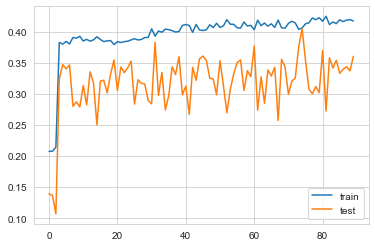

In [32]:
evaluation.plot()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_chi_train)
X_chi_train_scaled = scaler.transform(X_chi_train)
X_chi_test_scaled = scaler.transform(X_chi_test)

In [34]:
X_chi_train_scaled.shape

(6300, 47)

In [35]:
model = Sequential()
model.add(Dense(128, input_dim = 19, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________
